3-1

데이터 준비

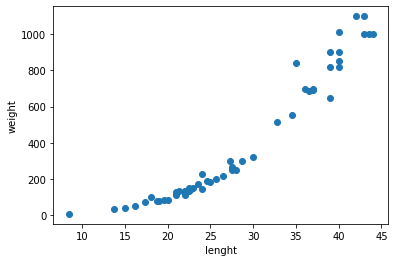

19.157142857142862
0.9804899950518966
0.974645996398761


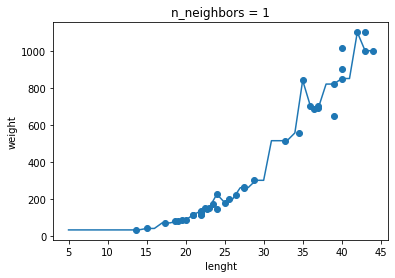

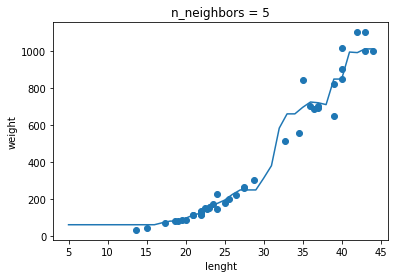

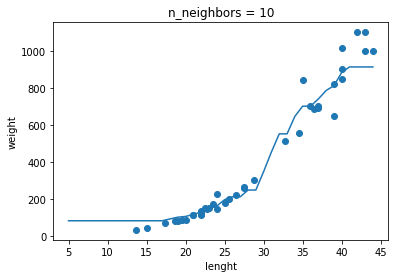

In [20]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)


#test_array = np.array([1,2,3,4])
#print(test_array)
#test_array = tset_array.reshape(2,2)
#print(test_array)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
#print(train_input, test_input)



from sklearn.neighbors import KNeighborsRegressor #K-최근접 회귀모델

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

knr.score(test_input, test_target)

from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

knr.n_neighbors = 3

knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))


# 회귀(Regression)는 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제이다.

예를 들면 내년도 경제 성장률을 예측하거나 배달이 도착할 시간을 예측하는 것이 회귀 문제입니다.
또 여기에서 주어진 문제처럼 농어의 무게를 예측하는 것도 회귀가 됩니다.
회귀는 정해진 클래스가 없고 임의의 수치를 출력합니다.

관련 모듈
sklearn.neighbors
관련  클래스
KNeighborsRegreessor


최근접 이웃 회귀

-결정계수(Coefficient of Determination, R^2) 

각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더합니다. 그다음 타깃과 타깃의 평균의 차이를 제곱하여 더한 값으로 나눈다.
만약 타깃의 평균 정도를 예측하는 수준이라면 (즉 분자와 분모가 비슷해져) R^2는 0에 가까워지고, 예측이 타깃에 아주 가까워지면 (분자가 0에 가까워지기 때문에) 1에 가까운 값이 됩니다.



**과대적합(Overfitting)** VS **과소적합(Underfitting)**
보통의 경우에 훈련 세트와 테스트 세트의 평가(score)시 훈련 세트의 점수가 조금 더 높게 나온다. 왜냐하면 훈련 세트에서 모델을 훈련했으므로 훈련 세트에서 더 좋은 점수가 나와야한다.

**만약 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 모델이 훈련 세트에 과대적합(overfitting)되었다고 말한다.**
즉 훈련 세트에서만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않을 것이다.

**반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우는 어떨까? 이런 경우를 모델이 훈련 세트에 과소적합(underfitting)되었다고 말한다.** 즉 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우이다.
훈련 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습하는 것이 중요하다.

위의 학습모델의 경우 훈련 세트보다 테스트 세트의 점수가 높게 나왔으므로 과소적합(underfitting)이며 이럴 경우 모델을 더 복잡하게 만들면된다.(반대의 경우 모델을 좀 더 단순하게 한다)

k-최근접 이웃 알고리즘의 경우 모델을 더 복잡하게 만드는 방법은 이웃의 개수를 줄이는것이고 반대로 모델을 더 단순하게 만드는 방법은 이웃의 개수를 늘리는것이다.
디폴트 : n_neighbors = 5 <- 과대적합의 경우 5이상, 과소적합의 경우 5이하

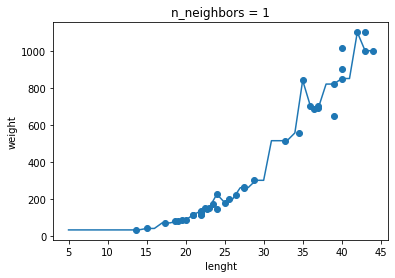

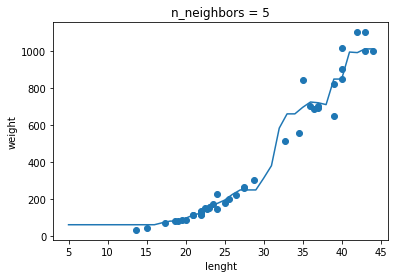

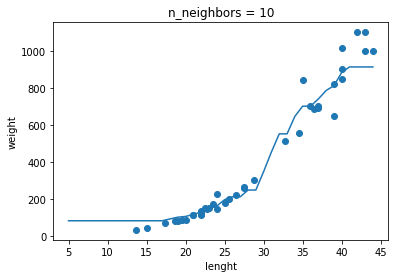

In [21]:
#연습문제

#1.②

#2.
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

for n in [1, 5, 10]:

  knr.n_neighbors = #n
  knr.fit(train_input, train_target)

  prediction = #knr.predict(x)

  import matplotlib.pyplot as plt
  plt.scatter(train_input,train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('lenght')
  plt.ylabel('weight')
  plt.show()
